In [14]:
import os
import numpy as np
import seaborn as sns
from matplotlib import image
from matplotlib import pyplot as plt

# Analysis of Tiling Effect

When inference maps are visualised, a very obvious tiling effect can be seen, with rough edges and seemingly consistent areas. Additionally, the temperature range of <10 to >40 seems significantly too broad, given that all time windows are from summer months. 

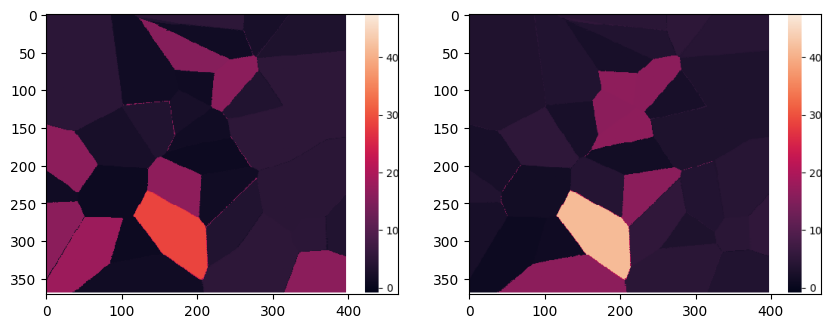

In [19]:
fig, ax = plt.subplots(1, 2, figsize=(10,10))
imgpath = 'S:/pools/t/T-IDP-Projekte-u-Vorlesungen/Meteoblue/QRF/Data/QRF Inference/2023-11-28_16.30/TempMaps/tempmap_12.png'
ax[0].imshow(image.imread(imgpath))
imgpath = 'S:/pools/t/T-IDP-Projekte-u-Vorlesungen/Meteoblue/QRF/Data/QRF Inference/2023-11-28_16.30/TempMaps/tempmap_13.png'
ax[1].imshow(image.imread(imgpath))


In [20]:
def var_replacement(xTest, variable='moving_average', type='uniform'):
    '''
    Random temp replacement for moving average temperature with three method options: either fill using a uniform value,
    a gradient from lowest to highest value or a four-square pattern.
    '''
    shape = xTest[variable].shape
    y = shape[1]
    x = shape[2]
    replacement = np.zeros(shape)
    if type == 'uniform':
        replacement = np.full(shape, 30)
    elif type == 'gradient':
        max = np.nanmax(xTest[variable])
        min = np.nanmin(xTest[variable])
        step = (max-min)/y
        for row in range(y):
            replacement[:, row] = [min + (step*row)]*x
    elif type == 'squares':
        xmid = int(x/2)
        ymid = int(y/2)
        max = np.nanmax(xTest[variable])
        min = np.nanmin(xTest[variable])
        replacement[:, :xmid, :ymid] = min
        replacement[:, xmid:, :ymid] = min + (max-min)/3
        replacement[:, :xmid, ymid:] = min + ((max-min)/3)*2
        replacement[:, xmid:, ymid:] = min + ((max-min)/3)*3

    xTest[variable] = replacement
    return xTest

def load_inference_data(datapath, ):
    data = load_file(datapath)
    _ = data.pop('datetime')
    _ = data.pop('time')
    _ = data.pop('temperature')
    if 'moving average' in data.keys():
        data['moving_average'] = data['moving average']
        _ = data.pop('moving average')
    data = var_replacement(data)
    return data, data['moving_average'].shape

def load_file(datapath):
    with open(datapath, 'rb') as file:
        data = joblib.load(file)
        file.close()
    return data